# Determining absolute hydration free energy offsets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Global-variables" data-toc-modified-id="Global-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Global variables</a></span></li><li><span><a href="#Feature-generation" data-toc-modified-id="Feature-generation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature generation</a></span><ul class="toc-item"><li><span><a href="#Descriptors" data-toc-modified-id="Descriptors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptors</a></span></li><li><span><a href="#Fingerprints" data-toc-modified-id="Fingerprints-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fingerprints</a></span></li><li><span><a href="#Compile-features" data-toc-modified-id="Compile-features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compile features</a></span></li><li><span><a href="#Remove-columns-with-string-values" data-toc-modified-id="Remove-columns-with-string-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Remove columns with string values</a></span></li><li><span><a href="#Convert-all-values-to-float" data-toc-modified-id="Convert-all-values-to-float-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Convert all values to float</a></span></li><li><span><a href="#Normalise-data" data-toc-modified-id="Normalise-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Normalise data</a></span></li><li><span><a href="#Perform-PCA-on-features-alone" data-toc-modified-id="Perform-PCA-on-features-alone-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Perform PCA on features alone</a></span></li><li><span><a href="#Recover-top-PCs" data-toc-modified-id="Recover-top-PCs-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Recover top PCs</a></span></li></ul></li><li><span><a href="#Label-generation" data-toc-modified-id="Label-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Label generation</a></span></li><li><span><a href="#Training-and-testing-set-generation" data-toc-modified-id="Training-and-testing-set-generation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Training and testing set generation</a></span><ul class="toc-item"><li><span><a href="#Full-dataset" data-toc-modified-id="Full-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Full dataset</a></span></li><li><span><a href="#Training-set" data-toc-modified-id="Training-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Training set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li><li><span><a href="#Testing-set" data-toc-modified-id="Testing-set-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Testing set</a></span><ul class="toc-item"><li><span><a href="#CSV" data-toc-modified-id="CSV-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>CSV</a></span></li><li><span><a href="#SDF" data-toc-modified-id="SDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>SDF</a></span></li></ul></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Perform-5-fold-cross-validation" data-toc-modified-id="Perform-5-fold-cross-validation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Perform 5-fold cross-validation</a></span></li><li><span><a href="#Start-log-file" data-toc-modified-id="Start-log-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Start log file</a></span></li><li><span><a href="#Define-SVR" data-toc-modified-id="Define-SVR-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define SVR</a></span></li><li><span><a href="#Train-SVR" data-toc-modified-id="Train-SVR-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Train SVR</a></span></li><li><span><a href="#Write-SVR-statistic-outputs" data-toc-modified-id="Write-SVR-statistic-outputs-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Write SVR statistic outputs</a></span></li><li><span><a href="#Plot-convergence" data-toc-modified-id="Plot-convergence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Plot convergence</a></span></li></ul></li><li><span><a href="#External-testing" data-toc-modified-id="External-testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>External testing</a></span><ul class="toc-item"><li><span><a href="#Per-SVR-model" data-toc-modified-id="Per-SVR-model-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Per SVR model</a></span></li><li><span><a href="#Averaged-over-all-models" data-toc-modified-id="Averaged-over-all-models-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Averaged over all models</a></span></li></ul></li><li><span><a href="#Corrected-hydration-free-energies" data-toc-modified-id="Corrected-hydration-free-energies-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Corrected hydration free energies</a></span></li><li><span><a href="#Determining-high-absolute-errors" data-toc-modified-id="Determining-high-absolute-errors-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Determining high absolute errors</a></span><ul class="toc-item"><li><span><a href="#Tanimoto-Coefficient" data-toc-modified-id="Tanimoto-Coefficient-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Tanimoto Coefficient</a></span></li><li><span><a href="#Absolute-error-&lt;-1.00" data-toc-modified-id="Absolute-error-<-1.00-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Absolute error &lt; 1.00</a></span></li><li><span><a href="#1.00-&lt;-absolute-error-&lt;-2.00" data-toc-modified-id="1.00-<-absolute-error-<-2.00-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>1.00 &lt; absolute error &lt; 2.00</a></span></li><li><span><a href="#Absolute-error-&gt;-2.00" data-toc-modified-id="Absolute-error->-2.00-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Absolute error &gt; 2.00</a></span></li></ul></li></ul></div>

## Imports

In [1]:
# General:
import pandas as pd
import numpy as np
import os
import csv
import subprocess
import time
import shutil
import glob
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns
import statistics
import pickle

# SciKit-Optimise:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.utils import use_named_args

# SVM:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import rdmolfiles, rdMolDescriptors
from rdkit.Chem import SDMolSupplier, Descriptors, Crippen, Lipinski, Fragments
from rdkit import DataStructs

# Misc.:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from scipy import stats
import statistics
import pickle
from mordred import Calculator, descriptors

/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Global variables

In [2]:
absolute_dGoffset_path = './absolute_dGoffset/'

# dataset_path = '~/Dropbox/FreeSolv/dGlearn-FreeSolv-master/datasets/train_compiled/dGhydr_train.csv'
offset_col_name = 'dGoffset (kcal/mol)'

# set data processing configurations:
PCA_threshold = 0.95  # Keeps n dimensions for x variance explained
replicates = 30  # Number of replicates per subject model
n_calls = 40  # Number of Bayesian optimisation loops for hyperparameter optimisation, 40 is best for convergence, > 60 scales to very expensive
startpoint_BO = np.inf  # Point to consider top-performing model from (MAE/MAD); 1.0 = no improvement on test-set variance
ensemble_size = 10  # Amount of top-scoring models to retain per fold-dataset combination
# KFold parameters:
n_splits = 5  # Number of K-fold splits
random_state = 2  # Random number seed

split = 'dG(hydr)'
translated_subject = 'absolute'

In [3]:
def plot_scatter(dataframe, x_info, y_info, title, MAE):
    """x and y info are lists with fomrat [datatframe_index, axis label]."""
    
    # x and y data
    x = dataframe.iloc[:, x_info[0]]
    y = dataframe.iloc[:, y_info[0]]
    
    # plot scatter
    plt.scatter(x, y, 
                color='black', 
                s=8)
    
    # plot line of best fit
    # https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
    plt.plot(np.unique(x), 
             np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 
             color='black', 
             linewidth=1)
    
    # axis labels
    plt.xlabel(x_info[1])
    plt.ylabel(y_info[1])
    
    plt.title(title)
    
    # R-squared
    r2 = r2_score(x, y)
    
    # MAE
    # MAE = mean_squared_error(x, y)
    
    # annotate with r-squared and MAE
    string = 'R-squared = {}\nMAE = {}'.format(round(r2, 4), round(MAE, 4))
    plt.annotate(string, 
                 xy=(0, 1), 
                 xytext=(12, -12), 
                 va='top', 
                 xycoords='axes fraction', 
                 textcoords='offset points')

## Feature generation
### Descriptors
- Open user-specified descriptors and create list.
- Consult http://mordred-descriptor.github.io/documentation/master/descriptors.html.
- All descriptors have been used.

In [4]:
descriptors_raw = open(absolute_dGoffset_path + 'features_X/mordred_descriptors/all_descriptors.txt', 'r')
descriptors_raw_list = [line.split('\n') for line in descriptors_raw.readlines()]
descriptors_list = [desc[0] for desc in descriptors_raw_list]

print('Number of descriptors:', str(len(descriptors_list)))

Number of descriptors: 1825


- Load in all FreeSolve SDF files.
- Calculate all descriptors.

In [5]:
# set up feature calculator
print("Generating features...")
calc = Calculator(descriptors, ignore_3D=False)

# Supply SDF
SDF_dr = './datasets/sdffiles/'
suppl = [sdf for sdf in glob.glob(SDF_dr + '*.sdf')]

# Empty DataFrame containing only descriptor names as headings
mordred_df = pd.DataFrame(columns=descriptors_list)

ID_lst = []

for mol in suppl:
    ID = mol.strip(SDF_dr)
    ID_lst.append(ID)
    feat = calc.pandas(Chem.SDMolSupplier(mol))
    mordred_df = mordred_df.append(feat, ignore_index=True, sort=False)

Generating features...


100%|██████████| 1/1 [00:00<00:00,  5.53it/s]


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


100%|██████████| 1/1 [00:00<00:00,  5.54it/s]


In [6]:
# Insert IDs as new column with column index = 0
mordred_df.insert(0, 'ID', ID_lst)
mordred_df

mordred_save_loc = absolute_dGoffset_path + 'features_X/mordred_descriptor_output/mordred_descriptors.csv'

if os.path.exists(mordred_save_loc):
    os.remove(mordred_save_loc)
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)
    print('Existing file overwritten.')
else:
    mordred_df.to_csv(path_or_buf=mordred_save_loc, index=False)

print('Completed writing all calculated mordred descriptors to CSV.')

Existing file overwritten.
Completed writing all calculated mordred descriptors to CSV.


### Fingerprints

In [7]:
FP_table = []

for sdf in glob.glob(SDF_dr + '*.sdf'):
    
    FP_row = []
    
    # Append ligand ID
    FP_row.append(sdf.strip(SDF_dr).strip('*.sdf'))
    
    # Setup fingerprint
    mol = Chem.rdmolfiles.SDMolSupplier(sdf)[0]
    mol.UpdatePropertyCache(strict=False)
    
    # Calculate fingerprint
    FP = rdMolDescriptors.GetHashedAtomPairFingerprint(mol, 256)
    for x in list(FP):
        FP_row.append(x)
    
    FP_table.append(FP_row)

# Column names
ID_col = ['ID']
FP_col = np.arange(0, 256).tolist()
FP_col = [ID_col.append("pfp" + str(item)) for item in FP_col]

FP_df = pd.DataFrame(FP_table, columns=ID_col)
FP_df

# Save to CSV
FP_save_loc = absolute_dGoffset_path + 'features_X/fingerprints_output/fingerprints.csv'

if os.path.exists(FP_save_loc):
    os.remove(FP_save_loc)
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)
    print('Existing file overwritten.')
else:
    FP_df.to_csv(path_or_buf=FP_save_loc, index=False)

print('Completed writing all calculated fingerprints to CSV.')

Existing file overwritten.
Completed writing all calculated fingerprints to CSV.


### Compile features

In [8]:
compiled_X_df = mordred_df
compiled_X_df = compiled_X_df.join(FP_df.set_index('ID'), on='ID')
# compiled_df = compiled_df.set_index('ID')
compiled_X_df

,ID,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
0,mobley_4188615,8.025464,7.680380,0,0,13.619695,2.250875,4.501749,13.619695,1.238154,...,0,0,0,0,0,0,0,0,3,2
1,mobley_820789,3.754314,4.057055,1,0,6.155367,1.902113,3.804226,6.155367,1.025895,...,0,0,0,0,0,0,0,0,0,0
2,mobley_1803862,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,...,0,0,0,0,0,0,0,0,0,0
3,mobley_1717215,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,...,0,0,0,0,0,0,0,0,0,0
4,mobley_5282042,16.320475,13.124505,0,1,27.545011,2.447633,4.822978,27.545011,1.311667,...,0,0,0,0,0,0,0,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,mobley_5123639,4.680200,4.942478,0,0,6.828427,2.000000,4.000000,6.828427,0.975490,...,0,0,1,1,0,0,0,0,0,0
638,mobley_1075836,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,...,0,0,0,0,0,0,0,0,0,0
639,mobley_3515580,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.244840,...,1,0,0,0,0,0,0,0,2,1
640,mobley_511661,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Save to 
if not os.path.isdir(absolute_dGoffset_path + 'features_X/tmp/'):
    os.mkdir(absolute_dGoffset_path + 'features_X/tmp/')
tmp_compiled_X = absolute_dGoffset_path + 'features_X/tmp/compiled_data.csv'

if os.path.exists(tmp_compiled_X):
    os.remove(tmp_compiled_X)
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)
    print('Existing file overwritten.')
else:
    compiled_X_df.to_csv(path_or_buf=tmp_compiled_X, index=False)

print('Completed writing temporary compiled features to CSV.')

Existing file overwritten.
Completed writing temporary compiled features to CSV.


### Remove columns with string values

In [10]:
def check_dataframe_is_numeric(dataframe):
    """Iterate over all columns and check if numeric.

    Returns:
    New DataFrame with removed"""

    columns_dropped = 0
    columns_dropped_lst = []

    for col in dataframe.columns:
        for index, x in zip(dataframe.index, dataframe.loc[:, col]):
            try:
                float(x)
            except ValueError:
                columns_dropped_lst.append([col, index, x])
                columns_dropped += 1
                dataframe = dataframe.drop(columns=col)
                break

    print('Number of columns dropped:', (columns_dropped))
    return dataframe, columns_dropped_lst


tmp_compiled_df = pd.read_csv(tmp_compiled_X, index_col='ID')
numeric_X, columns_dropped = check_dataframe_is_numeric(tmp_compiled_df)
numeric_X

/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,126,127,128,129,130,131,132,133,134,225,226,227,333,334,335,336,337,338,339,340,341,441,442,443,522,523,538,539,618,619,634,635,664,665,679,692,705,718,731,744,757,770,833,859,867,868,875,883,884,932,1275,1276,1277,1278,1299,1300,1349,1765,1793,1794,1796,1824) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of columns dropped: 712


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_4188615,8.025464,7.680380,0,0,13.619695,2.250875,4.501749,13.619695,1.238154,3.286693,...,0,0,0,0,0,0,0,0,3,2
mobley_820789,3.754314,4.057055,1,0,6.155367,1.902113,3.804226,6.155367,1.025895,2.595100,...,0,0,0,0,0,0,0,0,0,0
mobley_1803862,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,0,0,0,0,0,0,0,0,0,0
mobley_1717215,2.121320,2.340100,0,0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,0,0,0,0,0,0,0,0,0,0
mobley_5282042,16.320475,13.124505,0,1,27.545011,2.447633,4.822978,27.545011,1.311667,3.974821,...,0,0,0,0,0,0,0,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_5123639,4.680200,4.942478,0,0,6.828427,2.000000,4.000000,6.828427,0.975490,2.765108,...,0,0,1,1,0,0,0,0,0,0
mobley_1075836,3.644924,4.097495,0,0,6.898979,1.931852,3.863703,6.898979,1.149830,2.595800,...,0,0,0,0,0,0,0,0,0,0
mobley_3515580,6.432911,6.255590,0,0,11.203558,2.221583,4.443167,11.203558,1.244840,3.090233,...,1,0,0,0,0,0,0,0,2,1


- Columns dropped with respective ID index at infringing non-numeric value. The non-numeric value is also shown.
- Note: only one non-numeric value per column is detailed.

In [11]:
dropped_col_df = pd.DataFrame(columns_dropped, columns=['column dropped', 'at ID', 'non-numeric value'])
dropped_col_df

,column dropped,at ID,non-numeric value
0,VR3_A,mobley_9055303,divide by zero encountered in log (VR3_A/VR3)
1,ATS0s,mobley_9055303,missing intrinsic state for ['C'] (ATS0s/Props)
2,ATS1s,mobley_9055303,missing intrinsic state for ['C'] (ATS0s/Props)
3,ATS2s,mobley_9055303,missing intrinsic state for ['C'] (ATS0s/Props)
4,ATS3s,mobley_9055303,missing intrinsic state for ['C'] (ATS0s/Props)
...,...,...,...
707,TopoShapeIndex,mobley_9055303,invalid value encountered in double_scalars (T...
708,PetitjeanIndex,mobley_9055303,invalid value encountered in double_scalars (P...
709,Vabc,mobley_2727678,unknown atom type (Vabc)
710,VAdjMat,mobley_9055303,divide by zero encountered in log2 (VAdjMat)


In [12]:
# Save to CSV
dropped_col_save_loc = absolute_dGoffset_path + 'features_X/dropped_features.csv'

if os.path.exists(dropped_col_save_loc):
    os.remove(dropped_col_save_loc)
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)
    print('Existing file overwritten.')
else:
    dropped_col_df.to_csv(path_or_buf=dropped_col_save_loc, index=False)

print('Completed writing dropped columns to CSV.')

Existing file overwritten.
Completed writing dropped columns to CSV.


### Convert all values to float

In [13]:
float_X = numeric_X.apply(pd.to_numeric).astype(float).sample(frac=1)
float_X = float_X.rename(columns={'dGhydr (kcal/mol)': 'dGoffset (kcal/mol)'})
float_X

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9055303,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mobley_2410897,1.414214,1.414214,0.0,1.0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
mobley_819018,7.399237,7.388977,0.0,0.0,12.133645,2.047810,4.095621,12.133645,1.103059,3.219224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
mobley_6804509,7.427747,7.165349,0.0,0.0,11.683239,2.302776,4.605551,11.683239,1.168324,3.206353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
mobley_7415647,10.325124,9.526288,2.0,0.0,16.814625,2.307250,4.614501,16.814625,1.201045,3.527227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_3169935,5.835194,5.606207,0.0,0.0,9.953960,2.193527,4.387054,9.953960,1.244245,2.980241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
mobley_7150646,5.875634,5.525875,0.0,0.0,9.924777,2.170086,4.340173,9.924777,1.240597,2.979730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
mobley_186894,2.121320,2.340100,0.0,0.0,4.472136,1.618034,3.236068,4.472136,1.118034,2.155909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalise data

In [14]:
def normalise_and_split_datasets(dataframe):

    # Calculate statistics, compute Z-scores, clean:
    print('Normalising...')
    stats = dataframe.describe()
    stats = stats.transpose()

    def norm(x):
        return (x - stats['mean']) / stats['std']

    # Normalise and return separately:
    normed_data = norm(dataframe).fillna(0).replace([np.inf, -np.inf], 0.0)

    return normed_data


normalised_X = normalise_and_split_datasets(float_X)
normalised_X

Normalising...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9055303,-1.765511,-1.975793,-0.262213,-0.205174,-1.872873,-6.327014,-6.352789,-1.872873,-7.853128,-4.090929,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842
mobley_2410897,-1.356466,-1.501152,-0.262213,4.043915,-1.360075,-1.960596,-1.950671,-1.360075,-1.412244,-1.952672,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.085803
mobley_819018,0.374631,0.504109,-0.262213,-0.205174,0.326972,-0.004352,0.021569,0.326972,-0.317484,0.580312,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.080542,-0.490842
mobley_6804509,0.382877,0.429055,-0.262213,-0.205174,0.245313,0.782860,0.815216,0.245313,0.128381,0.556511,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,1.534353
mobley_7415647,1.220909,1.221438,2.855208,-0.205174,1.175640,0.796675,0.829145,1.175640,0.351916,1.149873,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,0.317210,0.319236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_3169935,-0.077750,-0.094227,-0.262213,-0.205174,-0.068207,0.445552,0.475151,-0.068207,0.647043,0.138382,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,0.714961,-0.085803
mobley_7150646,-0.066053,-0.121189,-0.262213,-0.205174,-0.073498,0.373179,0.402186,-0.073498,0.622122,0.137438,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,0.319236
mobley_186894,-1.151944,-1.190404,-0.262213,-0.205174,-1.062069,-1.331296,-1.316225,-1.062069,-0.215179,-1.385979,...,-0.264229,-0.126222,-0.210408,-0.19299,-0.118535,-0.245923,-0.110516,-0.148061,-0.478293,-0.490842


### Perform PCA on features alone

In [15]:
def reduce_features(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection

    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)

    # Fit to and transform training set:
    train_post_pca = pd.DataFrame(pca.fit_transform(training_data))
    
    # Reset column names to PCX
    PCA_col = np.arange(1, len(train_post_pca.columns) + 1).tolist()
    PCA_col = ['PC' + str(item) for item in PCA_col]
    train_post_pca.columns = PCA_col
    train_post_pca.index = training_data.index

    print('Number of PCA features after reduction: ' + str(len(train_post_pca.columns)))

    # pickle pca object to file so that external test sets can be transformed accordingly
    # (see https://stackoverflow.com/questions/42494084/saving-large-data-set-pca-on-disk
    # -for-later-use-with-limited-disc-space)
    # pickle.dump(pca, open('./opt_output/pca_trainingset.p', 'wb'))
    
    return train_post_pca  # return list with test_post_pca when needed


reduced_X = reduce_features(normalised_X, PCA_threshold)
reduced_X

Computing PCA, reducing features up to 95.0% VE...
Number of PCA features after reduction: 111


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111
ID,,,,,,,,,,,,,,,,,,,,,
mobley_9055303,-37.795351,-3.217519,3.920487,11.974766,1.585223,-6.073575,11.470222,13.964797,15.753535,6.730009,...,-1.218925,-2.026836,-0.648115,1.280260,-0.420145,-1.834044,0.135911,0.238063,2.480981,0.453285
mobley_2410897,-24.182907,-2.076189,2.313225,2.692006,2.373911,-2.246622,5.486502,6.400391,1.344274,0.077899,...,-0.914431,0.220395,0.343857,-0.553118,0.644183,0.683494,-0.025374,-1.130535,0.103249,-0.628287
mobley_819018,9.212028,-13.120791,-2.600916,0.536720,1.400350,2.252268,-0.666876,-4.503206,-0.786077,-2.775836,...,1.106896,1.918971,1.480909,0.595931,-1.904345,-0.080512,-0.359931,1.674823,0.734845,0.070062
mobley_6804509,2.874390,16.360800,-7.273795,3.410096,1.510418,-0.246550,-2.011533,-5.923338,0.076654,4.623068,...,-1.577407,0.254371,0.122187,-1.433414,-0.261868,-0.038037,0.396116,0.082052,0.326464,0.769748
mobley_7415647,22.147837,-0.235376,9.869652,-8.865893,3.962591,-1.323918,-4.110027,1.297708,-0.632626,5.715473,...,-0.837568,-0.133750,-0.838436,-0.864737,-1.242970,0.790304,-0.239504,-1.052073,-2.165238,-0.784932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_3169935,-3.378074,8.113764,-4.777225,-6.204119,0.720967,-2.787699,-3.383052,0.226320,-0.361908,-0.049578,...,-0.837667,-0.223422,0.349688,-0.899587,-0.419007,-0.730330,0.228939,-0.119280,0.081951,-0.030283
mobley_7150646,-3.447889,12.621910,-9.601274,4.544545,2.905497,-7.824151,-9.416593,-6.220061,0.538557,-0.356927,...,-1.300372,0.603879,1.677475,-1.996894,-1.329750,-0.025842,-0.079389,0.728654,-0.195778,2.858197
mobley_186894,-19.729234,-2.552177,-2.462589,5.488363,2.807004,-3.162461,-0.088969,2.990064,0.285409,-0.551937,...,0.042185,0.235629,-0.739001,0.856444,-0.325503,-0.193261,0.440774,0.332535,-0.182205,-0.494043


### Recover top PCs
Adapted from:
https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

In [16]:
def recovery_pc(normalised_collection, pca_threshold):

    print('Computing PCA, reducing features up to ' + str(round(pca_threshold * 100, 5)) + '% VE...')
    training_data = normalised_collection
    
    # normalise data
    data_scaled = pd.DataFrame(preprocessing.scale(training_data),columns = training_data.columns) 
    
    # Initialise PCA object, keep components up to x% variance explained:
    PCA.__init__
    pca = PCA(n_components=pca_threshold)
    pca.fit_transform(data_scaled)

    index = list(range(1, 111 + 1))
    index = ['PC{}'.format(x) for x in index]
    
    return_df = pd.DataFrame(pca.components_,columns=data_scaled.columns, index=index)
    
    return return_df


recovered_pc = recovery_pc(normalised_X, PCA_threshold)
recovered_pc

Computing PCA, reducing features up to 95.0% VE...


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,pfp246,pfp247,pfp248,pfp249,pfp250,pfp251,pfp252,pfp253,pfp254,pfp255
PC1,0.053976,0.054198,0.015937,-0.004576,0.053618,0.041761,0.042024,0.053618,0.025836,0.050459,...,0.020576,0.012315,0.012406,0.016567,0.011954,0.013646,0.007385,0.015307,0.029175,0.028708
PC2,0.011339,0.007288,0.000734,-0.019186,0.005497,0.020193,0.019887,0.005497,-0.002920,0.003832,...,0.010575,-0.009021,-0.001283,-0.008166,-0.009407,-0.009650,-0.012238,-0.007310,0.020015,0.049212
PC3,-0.011381,-0.003300,0.058166,-0.002203,-0.017340,-0.015196,-0.014053,-0.017340,-0.049394,-0.014102,...,-0.005622,0.006032,0.030868,0.006064,0.006772,0.027644,0.006390,0.039520,-0.043013,-0.052488
PC4,-0.009890,-0.007219,-0.016136,0.006888,-0.012238,-0.041802,-0.043790,-0.012238,-0.054378,-0.032154,...,0.008381,0.008463,0.012196,0.038284,0.005838,0.023141,0.023613,-0.000669,-0.038045,0.004834
PC5,-0.000478,-0.004139,0.098417,0.002668,0.001361,-0.022781,-0.021615,0.001361,0.003157,-0.010744,...,-0.032692,-0.032849,0.029192,-0.045655,0.001912,-0.063086,-0.038435,0.075212,0.009966,0.008696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC107,0.000153,-0.000300,0.003677,0.060190,0.000077,-0.003532,-0.003236,0.000077,0.010860,-0.002372,...,-0.067724,-0.048061,0.022960,0.020386,-0.079285,0.001982,0.011528,-0.008732,0.007298,-0.016019
PC108,0.000625,0.002119,-0.001000,0.016629,-0.002267,-0.004584,0.000178,-0.002267,-0.018824,0.002482,...,0.010942,0.025669,-0.031288,0.030569,-0.016745,-0.014324,0.005606,-0.048745,0.031757,-0.049456
PC109,0.000597,0.001546,0.017065,-0.132040,-0.001134,0.002101,0.001388,-0.001134,-0.016700,-0.000667,...,0.001370,0.027119,0.068351,0.039594,-0.027226,-0.011169,-0.000058,-0.046340,-0.011286,0.023728
PC110,0.004688,0.005099,0.004319,0.020189,-0.000285,-0.017675,-0.019282,-0.000285,-0.053443,0.000196,...,0.028428,0.011734,-0.097505,0.024118,0.038157,-0.076803,0.037657,-0.025968,0.004861,0.010405


In [17]:
# list of column names with highest value in each row
recovered_pc_max = recovered_pc.idxmax(axis=1)

# recovery 'PCX' indexing
pc_index = recovered_pc_max.index.tolist()

# write feature names to list
pc_feature = recovered_pc_max.values.tolist()

# write to df
recovered_pc_dict = {'PCX': pc_index, 'Highest contributing feature': pc_feature}
recovered_pc_df = pd.DataFrame(recovered_pc_dict)

recovered_pc_df

,PCX,Highest contributing feature
0,PC1,nHeavyAtom
1,PC2,Mv
2,PC3,ETA_dPsi_A
3,PC4,AETA_eta
4,PC5,ATSC1c
...,...,...
106,PC107,NdssS
107,PC108,pfp171
108,PC109,pfp171
109,PC110,NdssS


In [18]:
# Save to CSV
recov_pc_save_loc = absolute_dGoffset_path + 'recovered_PCs.csv'

if os.path.exists(recov_pc_save_loc):
    os.remove(recov_pc_save_loc)
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)
    print('Existing file overwritten.')
else:
    recovered_pc_df.to_csv(path_or_buf=recov_pc_save_loc, index=False)

print('Completed writing recovered PCs to CSV.')

Existing file overwritten.
Completed writing recovered PCs to CSV.


## Label generation

Complete FreeSolve database

In [19]:
# Load in FreeSolve
freesolv_loc = './datasets/database.txt'
freesolv_df = pd.read_csv(freesolv_loc, sep='; ', engine='python')
freesolv_df

,compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)benzene",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provide...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroet..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availab...


Absolute hydration free energy experimental offset values (dGoffset) were calculated using:

$$ offset=exp-calc $$

where propagation of random linear combination errors (uncertainty) were calculated using:

$$ \sigma_{offset}=\sqrt{(\sigma_{exp})^2+(\sigma_{calc})^2} $$

In [20]:
# Column names
freesolv_ID = freesolv_df.loc[:, 'compound id (and file prefix)']
exp_val = freesolv_df.loc[:, 'experimental value (kcal/mol)']
exp_err = freesolv_df.loc[:, 'experimental uncertainty (kcal/mol)']
calc_val = freesolv_df.loc[:, 'Mobley group calculated value (GAFF) (kcal/mol)']
calc_err = freesolv_df.loc[:, 'calculated uncertainty (kcal/mol)']

# New nested list containing IDs and offsets
offsets = []
for name, exp, err1, calc, err2 in zip(freesolv_ID, exp_val, exp_err, calc_val, calc_err):
    offset = exp - calc
    error = (err1**2 + err2**2)**0.5
    offsets.append([name, offset, round(error, 3)])

# Experimental offsets with uncertainties
exp_offset_with_errors_df = pd.DataFrame(offsets, columns=['ID', 'dGoffset (kcal/mol)', 'uncertainty (kcal/mol)'])

# Experimental offsets only
exp_offset = exp_offset_with_errors_df.drop(columns=['uncertainty (kcal/mol)'])
exp_offset = exp_offset.set_index('ID')
exp_offset

,dGoffset (kcal/mol)
ID,
mobley_1017962,0.81
mobley_1019269,-1.49
mobley_1034539,-1.96
mobley_1036761,-0.64
mobley_1046331,1.62
...,...
mobley_9913368,-1.80
mobley_9942801,-0.38
mobley_994483,-1.23


In [21]:
# Save to CSV
exp_offset_save_loc = absolute_dGoffset_path + 'labels_y/exp_labels.csv'

if os.path.exists(exp_offset_save_loc):
    os.remove(exp_offset_save_loc)
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    exp_offset.to_csv(path_or_buf=exp_offset_save_loc, index=False)

print('Completed writing all experimental dGoffsets to CSV.')

Existing file overwritten.
Completed writing all experimental dGoffsets to CSV.


## Training and testing set generation

### Full dataset

In [22]:
full_dataset = pd.concat([reduced_X, exp_offset], axis=1, sort=False)
full_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_9055303,-37.795351,-3.217519,3.920487,11.974766,1.585223,-6.073575,11.470222,13.964797,15.753535,6.730009,...,-2.026836,-0.648115,1.280260,-0.420145,-1.834044,0.135911,0.238063,2.480981,0.453285,-0.45
mobley_2410897,-24.182907,-2.076189,2.313225,2.692006,2.373911,-2.246622,5.486502,6.400391,1.344274,0.077899,...,0.220395,0.343857,-0.553118,0.644183,0.683494,-0.025374,-1.130535,0.103249,-0.628287,-1.34
mobley_819018,9.212028,-13.120791,-2.600916,0.536720,1.400350,2.252268,-0.666876,-4.503206,-0.786077,-2.775836,...,1.918971,1.480909,0.595931,-1.904345,-0.080512,-0.359931,1.674823,0.734845,0.070062,-1.93
mobley_6804509,2.874390,16.360800,-7.273795,3.410096,1.510418,-0.246550,-2.011533,-5.923338,0.076654,4.623068,...,0.254371,0.122187,-1.433414,-0.261868,-0.038037,0.396116,0.082052,0.326464,0.769748,-1.38
mobley_7415647,22.147837,-0.235376,9.869652,-8.865893,3.962591,-1.323918,-4.110027,1.297708,-0.632626,5.715473,...,-0.133750,-0.838436,-0.864737,-1.242970,0.790304,-0.239504,-1.052073,-2.165238,-0.784932,-1.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_3169935,-3.378074,8.113764,-4.777225,-6.204119,0.720967,-2.787699,-3.383052,0.226320,-0.361908,-0.049578,...,-0.223422,0.349688,-0.899587,-0.419007,-0.730330,0.228939,-0.119280,0.081951,-0.030283,-0.06
mobley_7150646,-3.447889,12.621910,-9.601274,4.544545,2.905497,-7.824151,-9.416593,-6.220061,0.538557,-0.356927,...,0.603879,1.677475,-1.996894,-1.329750,-0.025842,-0.079389,0.728654,-0.195778,2.858197,-1.21
mobley_186894,-19.729234,-2.552177,-2.462589,5.488363,2.807004,-3.162461,-0.088969,2.990064,0.285409,-0.551937,...,0.235629,-0.739001,0.856444,-0.325503,-0.193261,0.440774,0.332535,-0.182205,-0.494043,-0.92
mobley_6917738,-15.279975,-2.467912,5.028907,-0.760598,-1.343183,-0.712343,6.757303,3.939464,-2.196050,-0.750816,...,-1.521771,0.436647,1.412748,0.186139,-0.490431,5.467736,1.764374,-2.590843,1.050629,-1.52


In [23]:
# Save to CSV
full_dataset_save_loc = absolute_dGoffset_path + 'full_dataset.csv'

if os.path.exists(full_dataset_save_loc):
    os.remove(full_dataset_save_loc)
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=False)
    print('Existing file overwritten.')
else:
    full_dataset.to_csv(path_or_buf=full_dataset_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


In [24]:
# SAMPl4_Guthrie experimental reference in FreeSolv.
SAMPL4_Guthrie_ref = 'SAMPL4_Guthrie'
# Experimental reference column name.
exp_ref_col = 'experimental reference (original or paper this value was taken from)'

# List comprehension for all non-SAMPL4_Guthrie entires.
train_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] != SAMPL4_Guthrie_ref]

# List comprehension for all SAMPL4_Guthrie entires.
test_IDs = [freesolv_df.iloc[i][0]
              for i in range(len(freesolv_df)) 
              if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

### Training set
- All FreeSolve ligands that are not SAMPL4_Guthrie entries.

#### CSV

In [25]:
train_df = full_dataset.drop(test_IDs)
train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_9055303,-37.795351,-3.217519,3.920487,11.974766,1.585223,-6.073575,11.470222,13.964797,15.753535,6.730009,...,-2.026836,-0.648115,1.280260,-0.420145,-1.834044,0.135911,0.238063,2.480981,0.453285,-0.45
mobley_2410897,-24.182907,-2.076189,2.313225,2.692006,2.373911,-2.246622,5.486502,6.400391,1.344274,0.077899,...,0.220395,0.343857,-0.553118,0.644183,0.683494,-0.025374,-1.130535,0.103249,-0.628287,-1.34
mobley_6804509,2.874390,16.360800,-7.273795,3.410096,1.510418,-0.246550,-2.011533,-5.923338,0.076654,4.623068,...,0.254371,0.122187,-1.433414,-0.261868,-0.038037,0.396116,0.082052,0.326464,0.769748,-1.38
mobley_7415647,22.147837,-0.235376,9.869652,-8.865893,3.962591,-1.323918,-4.110027,1.297708,-0.632626,5.715473,...,-0.133750,-0.838436,-0.864737,-1.242970,0.790304,-0.239504,-1.052073,-2.165238,-0.784932,-1.91
mobley_2183616,4.341601,-5.795833,-10.172225,-3.888359,1.274587,1.281070,-4.026131,-2.187057,2.968590,0.199105,...,0.291856,-1.652168,1.211595,0.472848,0.124952,-1.001720,0.167844,-0.783978,0.475305,-0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mobley_3169935,-3.378074,8.113764,-4.777225,-6.204119,0.720967,-2.787699,-3.383052,0.226320,-0.361908,-0.049578,...,-0.223422,0.349688,-0.899587,-0.419007,-0.730330,0.228939,-0.119280,0.081951,-0.030283,-0.06
mobley_7150646,-3.447889,12.621910,-9.601274,4.544545,2.905497,-7.824151,-9.416593,-6.220061,0.538557,-0.356927,...,0.603879,1.677475,-1.996894,-1.329750,-0.025842,-0.079389,0.728654,-0.195778,2.858197,-1.21
mobley_186894,-19.729234,-2.552177,-2.462589,5.488363,2.807004,-3.162461,-0.088969,2.990064,0.285409,-0.551937,...,0.235629,-0.739001,0.856444,-0.325503,-0.193261,0.440774,0.332535,-0.182205,-0.494043,-0.92
mobley_6917738,-15.279975,-2.467912,5.028907,-0.760598,-1.343183,-0.712343,6.757303,3.939464,-2.196050,-0.750816,...,-1.521771,0.436647,1.412748,0.186139,-0.490431,5.467736,1.764374,-2.590843,1.050629,-1.52


In [26]:
# Save to CSV
train_df_save_loc = absolute_dGoffset_path + 'train_data.csv'

if os.path.exists(train_df_save_loc):
    os.remove(train_df_save_loc)
    train_df.to_csv(path_or_buf=train_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    train_df.to_csv(path_or_buf=train_df_save_loc, index=True)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [27]:
# Create train set directory
train_dr = absolute_dGoffset_path + 'train_dr/'
if os.path.isdir(train_dr):
    shutil.rmtree(train_dr)
    print('Existing directory overwritten.')
    os.mkdir(train_dr)
else:
    os.mkdir(train_dr) 

# Move non-SAMPL4_Guthrie SDF files to the new test_dr
for entry in train_IDs:
    sdf = entry + '.sdf'
    shutil.copyfile(SDF_dr + sdf, train_dr + sdf)

# Check the number of ligands found is correct.
print('Number of training entires in FreeSolv: {}'.format(len(glob.glob(train_dr + '*.sdf'))))

Existing directory overwritten.
Number of training entires in FreeSolv: 601


### Testing set
- All FreeSolve ligands that are SAMPL4_Guthrie entries.

#### CSV

In [28]:
test_df = full_dataset.drop(train_IDs)
test_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,dGoffset (kcal/mol)
mobley_819018,9.212028,-13.120791,-2.600916,0.536720,1.400350,2.252268,-0.666876,-4.503206,-0.786077,-2.775836,...,1.918971,1.480909,0.595931,-1.904345,-0.080512,-0.359931,1.674823,0.734845,0.070062,-1.93
mobley_5616693,10.397215,-12.002729,-3.410868,0.984975,-3.360114,8.266502,-4.381657,-1.887135,-1.139673,-0.332842,...,-0.045609,2.999340,1.577939,-1.470579,-0.684011,1.088798,0.134774,-0.699127,1.575665,0.99
mobley_2972345,19.252445,-1.303377,-17.649572,-5.556767,2.161010,2.198657,1.800235,-1.130440,5.756958,-1.138349,...,0.765175,1.195932,-1.551796,-0.615940,1.165047,1.169609,0.549569,0.208077,-2.666500,0.52
mobley_2613240,4.071452,0.544289,-1.316900,-6.685079,-5.244328,-0.203801,2.956061,-0.178296,1.958775,3.385141,...,0.112197,-0.866473,0.037819,0.309528,-0.406675,0.448495,0.948932,0.316606,0.198534,-1.28
mobley_3359593,14.227838,-4.216775,-1.855982,-5.647037,-0.015105,-0.806880,0.871502,-0.913765,-1.206737,-1.851997,...,-0.377661,-0.222661,-0.236131,-0.836426,0.896876,-0.081955,1.204728,0.237352,-0.995036,-1.13
mobley_7913234,2.114681,-10.947201,2.751673,1.574690,0.127062,2.313125,3.170040,-3.104876,-5.883509,-2.475732,...,0.395908,-0.464884,0.672589,0.716167,0.138696,1.062542,-0.344406,0.705591,-0.349414,-1.84
mobley_4587267,13.662193,-4.394387,13.122410,-1.268189,-1.317919,7.489627,5.927282,-4.009467,-13.308588,-8.347110,...,-1.118740,-0.960794,-0.316513,1.508481,-1.370668,0.049470,-1.778350,-0.356780,1.108482,-5.46
mobley_2316618,49.201690,-3.625702,-5.279986,-3.888075,0.068733,-7.551850,11.295927,6.656342,-0.467260,-12.739924,...,0.289539,-5.062734,1.877405,0.653667,-0.768798,-0.637931,0.122352,0.147398,2.043441,-0.61
mobley_2850833,-0.149850,6.816476,-1.665003,-9.438843,0.067991,-1.518807,-0.618530,0.545420,-3.304104,-2.472148,...,-0.584675,0.662996,0.466126,0.548135,0.121261,-0.179497,0.312943,-0.412337,0.102336,4.13
mobley_486214,9.040897,2.277013,1.513663,-8.175753,-5.139424,-0.340284,3.638226,0.070629,-1.124466,1.010133,...,-0.481652,0.803594,-0.480009,-0.510286,-0.136486,0.294528,2.091888,-0.429911,1.314703,0.43


In [29]:
# Save to CSV
test_df_save_loc = absolute_dGoffset_path + 'test_data.csv'

if os.path.exists(test_df_save_loc):
    os.remove(test_df_save_loc)
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)
    print('Existing file overwritten.')
else:
    test_df.to_csv(path_or_buf=test_df_save_loc, index=False)

print('Completed writing full dataset to CSV.')

Existing file overwritten.
Completed writing full dataset to CSV.


#### SDF

In [30]:
# Create test set directory
test_dr = absolute_dGoffset_path + 'test_dr/'
if os.path.isdir(test_dr):
    shutil.rmtree(test_dr)
    print('Existing directory overwritten.')
    os.mkdir(test_dr)
else:
    os.mkdir(test_dr)

# List comprehension for all SAMPL4_Guthrie SDF files.
test_sdf = [freesolv_df.iloc[i][0] + '.sdf' 
             for i in range(len(freesolv_df))  
             if freesolv_df.loc[i, exp_ref_col] == SAMPL4_Guthrie_ref]

# Move SAMPL4_Guthrie SDF files to the new test_dr
for sdf in test_sdf:
    shutil.copyfile(SDF_dr + sdf, test_dr + sdf)

# Check the number of ligands found is correct.
print('Number of testing entires in FreeSolv: {}'.format(len(glob.glob(test_dr + '*.sdf'))))

Existing directory overwritten.
Number of testing entires in FreeSolv: 41


## Training

### Perform 5-fold cross-validation

In [31]:
def split_dataset(dataset, n_splits, random_state):
    """KFold implementation for pandas DataFrame.
    (https://stackoverflow.com/questions/45115964/separate-pandas-dataframe-using-sklearns-kfold)"""
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    kfolds = []
    global offset_col_name
    
    for train, validate in kf.split(dataset):

        training = dataset.iloc[train]
        train_labels = training[offset_col_name]
        train_set = training.drop(offset_col_name, axis=1)

        validating = dataset.iloc[validate]
        validate_labels = validating[offset_col_name]
        validate_set = validating.drop(offset_col_name, axis=1)

        kfolds.append(
        [[train_set, validate_set],
        [train_labels, validate_labels]]
        )
    
    return kfolds


kfolds = split_dataset(train_df, n_splits, random_state)
kfolds

[[[                      PC1        PC2        PC3        PC4       PC5  \
   mobley_9055303 -37.795351  -3.217519   3.920487  11.974766  1.585223   
   mobley_6804509   2.874390  16.360800  -7.273795   3.410096  1.510418   
   mobley_2183616   4.341601  -5.795833 -10.172225  -3.888359  1.274587   
   mobley_3738859 -11.095844  -3.323714  -5.505599   8.236711  3.765661   
   mobley_9246351 -23.785762  13.611333  -2.276143  21.304258  6.887145   
   ...                   ...        ...        ...        ...       ...   
   mobley_1963873 -14.624380   0.457951   7.677059  -3.423616 -4.343961   
   mobley_5056289 -10.325505  -3.462723  -0.600593  -0.696799 -1.732844   
   mobley_7150646  -3.447889  12.621910  -9.601274   4.544545  2.905497   
   mobley_186894  -19.729234  -2.552177  -2.462589   5.488363  2.807004   
   mobley_1792062 -19.694845   8.060554  -3.690548  17.664377  5.628694   
   
                         PC6        PC7        PC8        PC9      PC10  ...  \
   mobley_905530

### Start log file

In [32]:
# initiate empty dataframe to fill with cumulative minima 
cumulative_MAEs = pd.DataFrame()
cumulative_MAEtauR_df = pd.DataFrame()
mae_results_per_fold = [['Subject', 'MAE', 'Replicate']]
MAEtauR_results_per_fold = [['Correlation Coefficient', 'Fold number', 'Correlation metric']]

# output directory path name
output_dr = absolute_dGoffset_path + 'output'

# clean slate opt_output:
if os.path.exists(output_dr):
    shutil.rmtree(output_dr)
if not os.path.exists(output_dr):
    os.mkdir(output_dr)
    
# initiate log file:
with open(output_dr + '/logfile.txt', 'w') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['————————————— Starting SVR Bayesian optimization —————————————'])
    writer.writerow(['PCA threshold: ' +str(PCA_threshold)])
    writer.writerow(['n replicates: ' + str(replicates)])
    writer.writerow(['n models in ensemble: ' + str(ensemble_size)])
    writer.writerow(['n calls (BO): ' + str(n_calls)])
    writer.writerow(['Started program at: ' + time.ctime()])

print(time.ctime())

Fri Dec 13 02:43:38 2019


### Define SVR

In [33]:
def svr(fold, fold_num):
    """
    Perofmrs:
    1. Unpack fold into training, validating x and Y
    2. Define SVR starting hyperparameters
    3. Setup SVR classifier
    4. Determine statistics for validating-y against SVR-predicted-y
    5. Pickle clasifier
    
    Returns:
    1. Skopt object
    2. Best performing model
    """
    
    # nested list containing all models
    all_models = []
    
    # retrieve datasets
    train_X = fold[0][0].values
    validate_X = fold[0][1].values
    train_y = fold[1][0].values
    validate_y = fold[1][1].values
    
    # validate label pandas series for statistical analysis
    validate_y_df = fold[1][1]

    # Set hyperparameter ranges, append to list:
    # skopt.space.Catagorical
    dim_param_C = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_C")
    dim_param_gamma = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_gamma")
    dim_param_epsilon = Categorical(categories=list(np.logspace(-3, 2, 6, dtype="float32")), name="param_epsilon")

    dimensions = [dim_param_C, dim_param_gamma, dim_param_epsilon]	

    @use_named_args(dimensions=dimensions)
    def fitness(param_C, param_gamma, param_epsilon):
        """Create svr with """

        
        # define SVR classifier
        regr = SVR(gamma=param_gamma, C=param_C, epsilon=param_epsilon)
        regr.fit(train_X, train_y)  

        predicted_y = regr.predict(validate_X)

        
        # calculate some statistics on validate set:
        MAE = mean_absolute_error(validate_y, predicted_y)
        MAD_validate = validate_y_df.mad()

        MAEMAD = MAE/MAD_validate
        print('MAE/MAD:', MAEMAD)

        valdt_ID_lst = validate_y_df.index.tolist()
        valdt_y_lst = validate_y_df.values.tolist()

        slope, intercept, r_value, p_value, std_err = stats.linregress(predicted_y, valdt_y_lst)
        tau, p_value = stats.kendalltau(predicted_y, valdt_y_lst)

        
        # For plotting test set correlations:
        tuples_result = list(zip(valdt_ID_lst, valdt_y_lst, predicted_y))
        # [ ..., [ID, [valdt_y], predicted_y], ... ]
        nested_lst_result = [list(elem) for elem in tuples_result]

        
        # Append data with best performing model.
        # Data contains the MAE/MAD score, protein target, iteration,
        # tau, r value, the keras DNN model, the internal validation plot 
        # and the data for external validation:

        global startpoint_MAEMAD
        
        if MAEMAD < startpoint_MAEMAD:
            startpoint_MAEMAD = MAEMAD
            # keep track of models
            all_models.append([MAEMAD, fold_num, tau, r_value, nested_lst_result])

            # write all model files:
            with open(output_dr + '/fold_' + str(fold_num) + '_SVM_model.svm', 'wb') as file:
                pickle.dump(regr, file)


        return MAEMAD


    # Bayesian Optimisation to search through hyperparameter space. 
    # Prior parameters were found by manual search and preliminary optimisation loops. 
    # For running just dataset 13x500 calls, optimal hyperparameters from 150 calls were used as prior.
    default_parameters = [1.0, 1.0, 1.0]
    print('——————————————————————————————————————————')
    print('Created model, optimising hyperparameters...')

    search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=n_calls,
                                x0=default_parameters)

    print('Concluded optimal hyperparameters:')
    print(search_result.x)

    print('——————————————————————————————————————————')

    # return skopt object and highest scoring model for this fold:
    return search_result, all_models[-1]

### Train SVR

In [34]:
fold_num = 1
models = []

for fold in kfolds:

    # run svr:
    # reset MAEMAD startpoint per replicate:
    startpoint_MAEMAD = startpoint_BO
    OptimizeResult, top_model = svr(fold, fold_num)

    models.append(top_model)

    # construct, cummin and concatenate results of this fold to the other folds in the loop:
    split_columns = { 
        'Fold' : str(fold_num), 
        'MAE/MAD' : OptimizeResult.func_vals}
    
    # construct individual fold result dataframe using the dictionary method
    fold_result_df = pd.DataFrame(split_columns).cummin()
    cumulative_MAEs = pd.concat([cumulative_MAEs, fold_result_df])

    # retrieve statistics for this replicate:
    tau = top_model[2]
    r_value = top_model[3]
    MAE = top_model[0]

    MAEtauR_results_per_fold.append([r_value, fold_num, 'Pearsons-r'])
    MAEtauR_results_per_fold.append([tau, fold_num, 'Kendalls-tau'])
    MAEtauR_results_per_fold.append([MAE, fold_num, 'MAE/MAD'])

    # write update to log file:
    with open(output_dr + '/logfile.txt', 'a') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerow(['Finished fold', fold_num, 'at', str(time.ctime())])
        
    fold_num += 1

print('——————————————————————————————————————————')
print('Finished training')

——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.00285228626405
MAE/MAD: 1.0070531651869836
MAE/MAD: 0.6987805303258303
MAE/MAD: 0.9155958563481528
MAE/MAD: 0.7081515974574765
MAE/MAD: 0.9991853173814866
MAE/MAD: 0.6987805303258303
MAE/MAD: 1.0103053858026172
MAE/MAD: 0.956049710322018
MAE/MAD: 1.001529551186937
MAE/MAD: 1.0102451398238361


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.039419134171664
MAE/MAD: 2.092383843051033
MAE/MAD: 0.9992867195278868
MAE/MAD: 2.09238384305103
MAE/MAD: 0.7860571821736558
MAE/MAD: 1.010314611791473


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9872448775527942
MAE/MAD: 1.0015295514157387
MAE/MAD: 1.0015295514157387
MAE/MAD: 0.9993159114174186


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 1.0099855339834223
MAE/MAD: 0.9873241640416922
MAE/MAD: 0.7432480749725702
MAE/MAD: 1.007935317504655
MAE/MAD: 1.0038732045580194
MAE/MAD: 0.7277696460520399
MAE/MAD: 0.9991880038471402
MAE/MAD: 0.8821375413062879
MAE/MAD: 0.7095766496929473
MAE/MAD: 0.452806609521884
MAE/MAD: 0.535597919296974
MAE/MAD: 0.4293558697793107
MAE/MAD: 1.0041881680176379
MAE/MAD: 0.6985321315114288
MAE/MAD: 0.4361941178801753
MAE/MAD: 0.4630531922016981
MAE/MAD: 0.5345414836734828
MAE/MAD: 0.9560124556355407
MAE/MAD: 0.45356509666476946
Concluded optimal hyperparameters:
[10.0, 0.001, 0.001]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0366627000026125
MAE/MAD: 2.8541219004740954
MAE/MAD: 0.9979877144363508
MAE/MAD: 0.9929974970335498
MAE/MAD: 2.8541219004740954
MAE/MAD: 0.9975503982493755
MAE/MAD: 0.9871826093402063
MAE/MAD: 0.9979791322990265
MAE/MAD: 2.8541219004740954
MAE/MAD: 2.8541219004740954
MAE

/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9978313982091402
MAE/MAD: 0.9975606305200826
MAE/MAD: 1.015617427324318
MAE/MAD: 1.0178346637022904
MAE/MAD: 0.6758481939930683
MAE/MAD: 0.7118644005109614
MAE/MAD: 0.9874086128355336
MAE/MAD: 0.6755103529836746
MAE/MAD: 0.9094292228942401
MAE/MAD: 1.0034590072105198
MAE/MAD: 1.1023549761584084
MAE/MAD: 0.9970900067527262
MAE/MAD: 1.0151127971469043
MAE/MAD: 1.0037716857866288
MAE/MAD: 0.9991131991573368
MAE/MAD: 0.9981966382269974


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7118644005109614
MAE/MAD: 0.9971671102818712


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7118644005109614
MAE/MAD: 0.4905019823293499
MAE/MAD: 0.5813838148149313


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5813838148149313
MAE/MAD: 0.4948750479003777
MAE/MAD: 0.48994714499378433
MAE/MAD: 0.5831251907584726
MAE/MAD: 0.5224905164794731
MAE/MAD: 0.5807578242580178
MAE/MAD: 0.505278631302936
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0115935498621544
MAE/MAD: 2.172541325874573
MAE/MAD: 2.1725413258745707
MAE/MAD: 0.9922844796199002
MAE/MAD: 2.1725413258745707
MAE/MAD: 0.9863806885238143
MAE/MAD: 0.9933781389611702
MAE/MAD: 2.172541325874573
MAE/MAD: 0.8323667663664253
MAE/MAD: 2.1725413258745707


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  s

MAE/MAD: 2.172541325874573
MAE/MAD: 0.740686532250925
MAE/MAD: 0.9920190753027751
MAE/MAD: 0.9820782901640953
MAE/MAD: 0.9072656732062943
MAE/MAD: 0.828015543457051
MAE/MAD: 0.9807472202343074
MAE/MAD: 0.9822504715174036


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9821045102645675
MAE/MAD: 0.9820685820650185
MAE/MAD: 0.9822953358765403
MAE/MAD: 0.9716299959784241
MAE/MAD: 0.9823799992057676
MAE/MAD: 0.8840588542523405
MAE/MAD: 0.9881623076446324
MAE/MAD: 1.0455150613616484
MAE/MAD: 0.9444153697879892
MAE/MAD: 0.9800341702510444
MAE/MAD: 0.904834218992788
MAE/MAD: 0.9446627214595128
MAE/MAD: 0.7193178944287097
MAE/MAD: 0.981493726535134
MAE/MAD: 0.623016403740601
MAE/MAD: 0.9780363269946862
MAE/MAD: 0.7399705424476358


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7399705424476358
MAE/MAD: 0.7325781872818712


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.623016403740601
MAE/MAD: 0.6245383737530663
MAE/MAD: 0.9347686776184145
Concluded optimal hyperparameters:
[100.0, 0.001, 0.1]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 1.0226968083629382
MAE/MAD: 1.0009521838128743
MAE/MAD: 1.0009521838128743
MAE/MAD: 0.9938870310174271
MAE/MAD: 0.9824430757811443
MAE/MAD: 1.0009521838128743
MAE/MAD: 0.9778720183065815
MAE/MAD: 1.0009521838128743
MAE/MAD: 1.0009521838128752


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  s

MAE/MAD: 1.0004450310149444
MAE/MAD: 0.5704215455462783
MAE/MAD: 1.0009521838128743


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8428715058095744
MAE/MAD: 0.9426674754075968
MAE/MAD: 0.6373429660478451
MAE/MAD: 0.5929608587785741
MAE/MAD: 0.9412000245312591
MAE/MAD: 0.9959435320765009
MAE/MAD: 1.0009521838128752


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9776235182257709
MAE/MAD: 1.002391407410745
MAE/MAD: 0.5702818316586808
MAE/MAD: 0.7898019155852465
MAE/MAD: 0.5929020139319954
MAE/MAD: 1.0009521838128743


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.6383903807637338
MAE/MAD: 0.5730765292479826
MAE/MAD: 1.0009521838128752


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.8426809986232072
MAE/MAD: 0.6464255471990499
MAE/MAD: 0.5946119218928082
MAE/MAD: 1.0006607151876292
MAE/MAD: 0.7903652717708434
MAE/MAD: 1.0003741941913304
MAE/MAD: 0.8003130264261952
MAE/MAD: 0.7838469662848618
MAE/MAD: 0.798793614673161
MAE/MAD: 0.9817076255311243
MAE/MAD: 1.001089622620304


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5702818316586808
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Created model, optimising hyperparameters...
MAE/MAD: 0.9851498777897385
MAE/MAD: 2.0323803648015284
MAE/MAD: 2.0323803648015284
MAE/MAD: 0.9632014170141205
MAE/MAD: 2.0323803648015284
MAE/MAD: 0.9684256614805193
MAE/MAD: 0.9588187787323775
MAE/MAD: 2.0323803648015306
MAE/MAD: 2.0323803648015306


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9705624595512713
MAE/MAD: 0.9633195073320687
MAE/MAD: 0.9626043585753797
MAE/MAD: 0.963101907608158


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


MAE/MAD: 0.9632014170075961
MAE/MAD: 0.7485900320631961
MAE/MAD: 0.9606929844657003
MAE/MAD: 0.7393974789034308
MAE/MAD: 0.7641671354265592
MAE/MAD: 0.9562571688970245
MAE/MAD: 0.7399030779135768
MAE/MAD: 0.7389024525808578


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.7399030779135768
MAE/MAD: 0.7492066955492365
MAE/MAD: 0.5572261387857715
MAE/MAD: 0.9703399224897397
MAE/MAD: 0.7149038090456338
MAE/MAD: 0.8137675348897694
MAE/MAD: 0.9589592078384287
MAE/MAD: 0.9316128569839127
MAE/MAD: 0.813762440041924
MAE/MAD: 0.7195438622407224
MAE/MAD: 0.6224646290847285
MAE/MAD: 0.5838312444552902
MAE/MAD: 0.9589906477575744
MAE/MAD: 0.5847240450285333


/Users/wilsonwu/anaconda3/envs/freesolv/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


MAE/MAD: 0.5847240450285333
MAE/MAD: 0.5704486024516691
MAE/MAD: 0.5577765484410648
MAE/MAD: 0.62382608649475
MAE/MAD: 0.9705420626044954
Concluded optimal hyperparameters:
[10.0, 0.001, 0.01]
——————————————————————————————————————————
——————————————————————————————————————————
Finished training


### Write SVR statistic outputs

In [35]:
# models: [MAEMAD, fold_num, tau, r_value, nested_lst_result]
# nested_lst_results: [ ..., [ID, [valdt_y], predicted_y], ... ]

# make ensemble of best models; pick n replicates' top performing models:
# explaination of key=lambda:
# https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
all_models = sorted(models, key=lambda x: x[0])

for model in all_models:

    internal_fold_num = model[1]
    internal_validation = model[4]

    # For each model, write internal validation to file
    with open(output_dr + '/fold_' + str(internal_fold_num) + '_internal_validation.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(['ID', 'Experimental dGoffset (kcal/mol)', 'Predicted dGoffset (kcal/mol)'])
        for row in internal_validation:
            writer.writerow(row)

In [36]:
MAEtauR_df = pd.DataFrame(MAEtauR_results_per_fold[1:], columns=MAEtauR_results_per_fold[0])
cumulative_MAEtauR_df = pd.concat([cumulative_MAEtauR_df, MAEtauR_df])

# Save to CSV
cumulative_MAEtauR_df_save_loc = output_dr + '/dGoffset_SVR_MAEtauR_outputs.csv'

if os.path.exists(cumulative_MAEtauR_df_save_loc):
    os.remove(cumulative_MAEtauR_df_save_loc)
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEtauR_df.to_csv(path_or_buf=cumulative_MAEtauR_df_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

cumulative_MAEtauR_df

Completed writing cumulative MAE, tau and R to CSV.


,Correlation Coefficient,Fold number,Correlation metric
0,0.864024,1,Pearsons-r
1,0.679069,1,Kendalls-tau
2,0.429356,1,MAE/MAD
3,0.826709,2,Pearsons-r
4,0.687684,2,Kendalls-tau
5,0.489947,2,MAE/MAD
6,0.709772,3,Pearsons-r
7,0.583339,3,Kendalls-tau
8,0.623016,3,MAE/MAD
9,0.712362,4,Pearsons-r


In [37]:
# Save to CSV
cumulative_MAE_save_loc = output_dr + '/dGoffset_SVR_BO_MAE.csv'

if os.path.exists(cumulative_MAE_save_loc):
    os.remove(cumulative_MAE_save_loc)
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)
    print('Existing file overwritten.')
else:
    cumulative_MAEs.to_csv(path_or_buf=cumulative_MAE_save_loc, index=True)

print('Completed writing cumulative MAE, tau and R to CSV.')

# five folds with a 40 calls each
cumulative_MAEs

Completed writing cumulative MAE, tau and R to CSV.


,Fold,MAE/MAD
0,1,1.00285
1,1,1.00285
2,1,0.698781
3,1,0.698781
4,1,0.698781
...,...,...
35,5,0.557226
36,5,0.557226
37,5,0.557226
38,5,0.557226


### Plot convergence

In [38]:
cumulative_MAE_df = pd.read_csv(cumulative_MAE_save_loc, index_col=[0])
cumulative_MAE_df["Calls"] = cumulative_MAE_df.index
cumulative_MAE_df

,Fold,MAE/MAD,Calls
0,1,1.002852,0
1,1,1.002852,1
2,1,0.698781,2
3,1,0.698781,3
4,1,0.698781,4
...,...,...,...
35,5,0.557226,35
36,5,0.557226,36
37,5,0.557226,37
38,5,0.557226,38


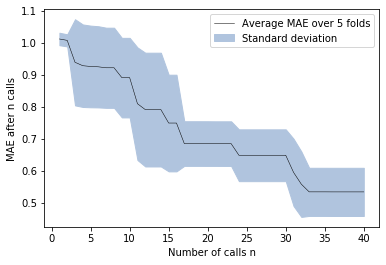

In [39]:
def plot_convergence(dataframe, n_calls):

    # x values
    x = list(range(1, n_calls + 1))
    
    # y values
    cumltv_MAE = [dataframe.loc[dataframe['Fold'] == fold, 'MAE/MAD'].tolist()
                   for fold in range(1, 6)]
    cumltv_MAE = list(zip(*cumltv_MAE))   
    y = [statistics.mean(call) for call in cumltv_MAE]
    
    # standard devation
    stdev = [statistics.stdev(call) for call in cumltv_MAE]
    
    # standard devation bounds
    y1 = [i - sd for i, sd in zip(y, stdev)]
    y2 = [i + sd for i, sd in zip(y, stdev)]
    
    # plot mean line
    line = plt.plot(x, 
             y, 
             color='black', 
             linewidth=0.5, 
                    label='Average MAE over 5 folds')
    
    # plot standard deviation bounds
    fill = plt.fill_between(x, 
                     y1, 
                     y2, 
                     fc='lightsteelblue', 
                            ec='lightsteelblue', 
                            label='Standard deviation')
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')

    plt.legend()


plot_convergence(cumulative_MAE_df, 40)

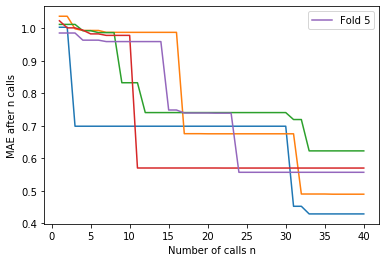

In [40]:
def plot_individual_convergence(dataframe, fold, n_calls):

    x = list(range(1, n_calls + 1))
    y = dataframe.loc[dataframe['Fold'] == fold]
    y = y['MAE/MAD'].tolist()

    line = plt.plot(x, y, label='Fold {}'.format(fold))
    
    plt.xlabel('Number of calls n')
    plt.ylabel('MAE after n calls')
    
    plt.legend(handles=line)


num_folds = range(1, 6)  # 5 folds
for fold in num_folds:
    plot_individual_convergence(cumulative_MAE_df, fold, 40)

## External testing

### Per SVR model

In [41]:
def svr_predict(model_num, test_set):

    with open(output_dr + '/fold_' + str(model_num) + '_SVM_model.svm', 'rb') as file:
        model = pickle.load(file)
    
    return model.predict(test_set)


def calc_mae(dataframe, model):

    model_df = dataframe.loc[dataframe['Model number'] == model]
    abs_err = model_df['Absolute error (kcal/mol)'].tolist()
    MAE = statistics.mean(abs_err)
    
    return MAE


# load in testing set
# note: test_df defined previously in section 5.3
test_ID = test_df.index
test_X = test_df.drop(columns='dGoffset (kcal/mol)').values
test_y = test_df['dGoffset (kcal/mol)'].values

# empty df for external testing results
test_rst = pd.DataFrame()

# peform prediction using each model
num_models = num_folds

for model in num_models:
    
    # call SVR prediction function
    svr_rst = svr_predict(model, test_X)
    
    # write results per fold into dictionary and load into df
    model_rst = {}
    model_rst['ID'] = test_ID
    model_rst['Model number'] = [model for i in range(41)]
    model_rst['Experimental dGoffset (kcal/mol)'] = test_y
    model_rst['Predcted dGoffset (kcal/mol)'] = svr_rst
    model_rst['Absolute error (kcal/mol)'] = abs(test_y - svr_rst)

    test_rst = pd.concat([test_rst, pd.DataFrame(model_rst)])


# calculate MAE values
MAE_lst = [calc_mae(test_rst, model) for model in num_models]
print('MAE values between experimental and predicted dGoffset values:\n')
for model, model_MAE in enumerate(MAE_lst):
    print('Model {} MAE: {} kcal/mol'.format(model + 1, round(model_MAE, 2)))
print('\nAverage MAE: {} kcal/mol'.format(round(statistics.mean(MAE_lst), 2)))


test_rst = test_rst.round(2)
test_rst

MAE values between experimental and predicted dGoffset values:

Model 1 MAE: 0.83 kcal/mol
Model 2 MAE: 0.87 kcal/mol
Model 3 MAE: 0.94 kcal/mol
Model 4 MAE: 0.87 kcal/mol
Model 5 MAE: 0.79 kcal/mol

Average MAE: 0.86 kcal/mol


,ID,Model number,Experimental dGoffset (kcal/mol),Predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_819018,1,-1.93,-1.81,0.12
1,mobley_5616693,1,0.99,0.82,0.17
2,mobley_2972345,1,0.52,1.14,0.62
3,mobley_2613240,1,-1.28,0.31,1.59
4,mobley_3359593,1,-1.13,-0.53,0.60
...,...,...,...,...,...
36,mobley_9897248,5,-2.18,-1.57,0.61
37,mobley_3802803,5,-0.06,-0.26,0.20
38,mobley_8883511,5,0.62,0.54,0.08
39,mobley_1160109,5,-0.41,0.16,0.57


### Averaged over all models

In [42]:
# average predicted offset values
prdt_offsets = [test_rst.loc[test_rst['Model number'] == model, 'Predcted dGoffset (kcal/mol)'].tolist()
                   for model in num_models]
prdt_offsets = list(zip(*prdt_offsets))
avg_offsets = [statistics.mean(offset_set) for offset_set in prdt_offsets]

# write results to df
avg_rst = {}

avg_rst['ID'] = test_ID
avg_rst['Experimental dGoffset (kcal/mol)'] = test_y
avg_rst['Averaged predcted dGoffset (kcal/mol)'] = avg_offsets
avg_rst['Absolute error (kcal/mol)'] = abs(test_y - avg_offsets)

avg_rst_df = pd.DataFrame(avg_rst)

# MAE
print('MAE between experimental and averaged predicted dGoffsets:')
test_offset_MAE = round(statistics.mean(abs(test_y - avg_offsets)), 2)
print('MAE: {} kcal/mol'.format(test_offset_MAE))

avg_rst_df = avg_rst_df.round(2)
avg_rst_df

MAE between experimental and averaged predicted dGoffsets:
MAE: 0.83 kcal/mol


,ID,Experimental dGoffset (kcal/mol),Averaged predcted dGoffset (kcal/mol),Absolute error (kcal/mol)
0,mobley_819018,-1.93,-1.53,0.40
1,mobley_5616693,0.99,0.68,0.31
2,mobley_2972345,0.52,0.87,0.35
3,mobley_2613240,-1.28,0.50,1.78
4,mobley_3359593,-1.13,-0.32,0.81
5,mobley_7913234,-1.84,-1.81,0.03
6,mobley_4587267,-5.46,-5.38,0.08
7,mobley_2316618,-0.61,1.40,2.01
8,mobley_2850833,4.13,0.12,4.01
9,mobley_486214,0.43,-0.35,0.78


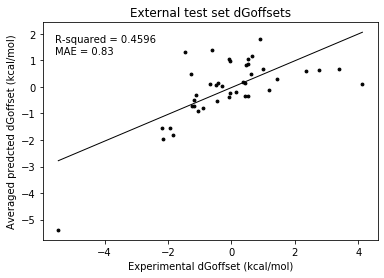

In [43]:
plot_scatter(avg_rst_df, 
        [1, 'Experimental dGoffset (kcal/mol)'], 
        [2, 'Averaged predcted dGoffset (kcal/mol)'], 
             title='External test set dGoffsets', 
             MAE=test_offset_MAE)

## Corrected hydration free energies

In [44]:
# SAMPL4 Gurthrie df
test_fs_df = freesolv_df.loc[freesolv_df.iloc[:, 7] == 'SAMPL4_Guthrie']

# experimental dGhydr
test_exp = test_fs_df.iloc[:, 3]

# calculated dGhydr
test_calc = test_fs_df.iloc[:, 5].tolist()

# calculated dGhydr uncertainty
test_calc_err = test_fs_df.iloc[:, 6].tolist()

# corrected calculated Ghydr using predicted dGoffsets
corr_calc = [calc + err for calc, err in zip(test_calc, avg_offsets)]

# calculated dGhydr absolute error
calc_AE = [abs(exp - calc) for exp, calc in zip(test_exp, test_calc)]

# corrected calculated dGhydr propogated absolute error
# corr_AE = (err1**2 + err2**2)**0.5
corr_AE = [abs(exp - calc) for exp, calc in zip(test_exp, corr_calc)]

# create df
corr_dict = {'ID': test_ID, 
             'Experimental dGhydr (kcal/mol)': test_exp, 
             'Calculated dGhydr (kcal/mol)': test_calc, 
             'Calculated dGhydr absolute error (kcal/mol)': calc_AE,  
             'Corrected calculated dGhydr (kcal/mol)': corr_calc, 
             'Corrected calculated dGhydr absolute error (kcal/mol)': corr_AE}

corr_df = pd.DataFrame(corr_dict).round(2)

# calculate MAEs
calc_MAE = statistics.mean(calc_AE)
print('Mobley calculated MAE: {} kcal/mol'.format(round(calc_MAE, 2)))
corr_MAE = statistics.mean(corr_AE)
print('Corrected calculated MAE: {} kcal/mol'.format(round(corr_MAE, 2)))

corr_df

Mobley calculated MAE: 1.17 kcal/mol
Corrected calculated MAE: 1.59 kcal/mol


,ID,Experimental dGhydr (kcal/mol),Calculated dGhydr (kcal/mol),Calculated dGhydr absolute error (kcal/mol),Corrected calculated dGhydr (kcal/mol),Corrected calculated dGhydr absolute error (kcal/mol)
10,mobley_819018,-3.75,-3.34,0.41,-4.87,1.12
79,mobley_5616693,-9.34,-7.87,1.47,-7.19,2.15
98,mobley_2972345,-5.66,-4.77,0.89,-3.90,1.76
113,mobley_2613240,-14.21,-13.60,0.61,-13.10,1.11
123,mobley_3359593,-11.85,-15.25,3.40,-15.57,3.72
140,mobley_7913234,-5.33,-4.05,1.28,-5.86,0.53
141,mobley_4587267,-4.80,-5.32,0.52,-10.70,5.90
162,mobley_2316618,-4.68,-8.81,4.13,-7.41,2.73
173,mobley_2850833,-3.78,-4.30,0.52,-4.18,0.40
180,mobley_486214,-0.85,-0.76,0.09,-1.11,0.26


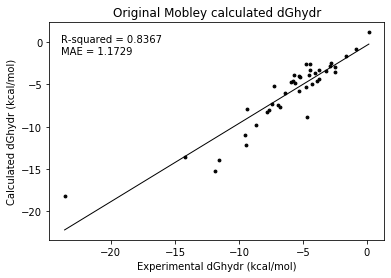

In [45]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [2, 'Calculated dGhydr (kcal/mol)'], 
             title='Original Mobley calculated dGhydr', 
             MAE=calc_MAE)

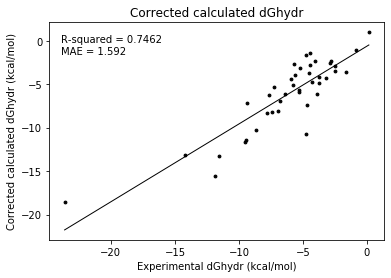

In [46]:
plot_scatter(corr_df, 
        [1, 'Experimental dGhydr (kcal/mol)'], 
        [4, 'Corrected calculated dGhydr (kcal/mol)'], 
             title='Corrected calculated dGhydr', 
             MAE=corr_MAE)

## Determining high absolute errors

In [47]:
def draw_structure_panel(sdf_suppl, legend):
    'Draw RDKit.Draw in panel format.'

    suppl = [SDMolSupplier(sdf) for sdf in sdf_suppl]
    mols = [x[0] for x in suppl if x is not None]
    for mol in mols:
        tmp = AllChem.Compute2DCoords(mol)
    
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200), legends=legend)    

$$ \Delta{G_{offset}} = \Delta{G_{exp}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{offset}} = \Delta{G_{corrected}} - \Delta{G_{calc}} $$
$$ \Rightarrow \Delta{G_{corrected}} = \Delta{G_{calc}} + \Delta{G_{offset}} $$

### Tanimoto Coefficient

$$ T_{a,b}=\frac{M_{a,b}}{M_{a}+M_{b}+M_{a,b}} $$
$$ M_{a}=single test set ligand 1D feature list $$
$$ M_{b}=validation set feature list $$
$$ M_{a,b}= $$

In [48]:
def fingerprint_similarity(fold):
    
    # retrieve IDs
    train_IDs = fold[0][0].index.tolist()
    validate_IDs = fold[0][1].index.tolist()
    test_IDs = test_ID.tolist()

    # retrieve SDFs
    train_suppl = [Chem.SDMolSupplier(train_dr + sdf + '.sdf') 
                   for sdf in train_IDs]

    valdtn_suppl = [Chem.SDMolSupplier(train_dr + sdf + '.sdf') 
               for sdf in validate_IDs]

    test_suppl = [Chem.SDMolSupplier(test_dr + sdf + '.sdf') 
           for sdf in test_IDs]
    
    # generate fingerprints
    train_fp = [Chem.RDKFingerprint(mol) for mol in train_suppl]
    valdtn_fp = [Chem.RDKFingerprint(mol) for mol in valdtn_suppl]
    test_fp = [Chem.RDKFingerprint(mol) for mol in test_suppl]
    
    # compare fingerprints
    test_train_similarity = [DataStructs.FingerprintSimilarity(test_mol, train_mol)
                            for test_mol in test_fp
                            for train_mol in train_fp]
    
    test_valdtn_similarity = [DataStructs.FingerprintSimilarity(test_mol, valdtn_mol)
                        for test_mol in test_fp
                        for valdtn_mol in valdtn_fp]
    
    return test_train_similarity, test_valdtn_similarity


lst1, lst2 = fingerprint_similarity(kfolds[0])

OSError: File error: Bad input file ./absolute_dGoffset/train_dr/mobley_3378420.sdf

In [ ]:
def tanimoto(list1, list2):
  intersection = [common_item for common_item in list1 if common_item in list2]
  return float(len(c))/(len(a) + len(b) - len(c))

In [ ]:
# list of test SDF paths from section 5.3.2
new_test_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf
               for sdf in test_sdf]

corr_AE = corr_df.iloc[:, 5].tolist()
corr_AE = [str(x) for x in corr_AE]

# draw_structure_panel(new_test_sdf, corr_AE)

### Absolute error < 1.00

In [ ]:
# df containing entries with corrected calculated dGhydr absolute errors < 1.00
below_one_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 1.00]

# sdf paths
below_one_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in below_one_df['ID']]

# Actual absolute error values
below_one_AE = [str(x) for x in below_one_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(below_one_df), 'structures have dGhydr absolute erros < 1.00 kcal/mol')
draw_structure_panel(below_one_sdf, below_one_AE)

### 1.00 < absolute error < 2.00

In [ ]:
# df containing entries with corrected calculated dGhydr 1.00 < absolute errors < 2.00
between_1and2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] < 2.00]
between_1and2_df = between_1and2_df.loc[between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 1.00]

# sdf paths
between_1and2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in between_1and2_df['ID']]

# Actual absolute error values
between_1and2_AE = [str(x) for x in between_1and2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(between_1and2_df), 'structures have dGhydr 1.00 < absolute erros < 2.00 kcal/mol')
draw_structure_panel(between_1and2_sdf, between_1and2_AE)

### Absolute error > 2.00

In [ ]:
# df containing entries with corrected calculated dGhydr absolute errors > 2.00
above_2_df = corr_df.loc[corr_df['Corrected calculated dGhydr absolute error (kcal/mol)'] > 2.00]

# sdf paths
above_2_sdf = [absolute_dGoffset_path + 'test_dr/' + sdf + '.sdf'
                for sdf in above_2_df['ID']]

# Actual absolute error values
above_2_AE = [str(x) for x in above_2_df['Corrected calculated dGhydr absolute error (kcal/mol)']]

print(len(above_2_df), 'structures have dGhydr absolute erros > 2.00 kcal/mol')
draw_structure_panel(above_2_sdf, above_2_AE)